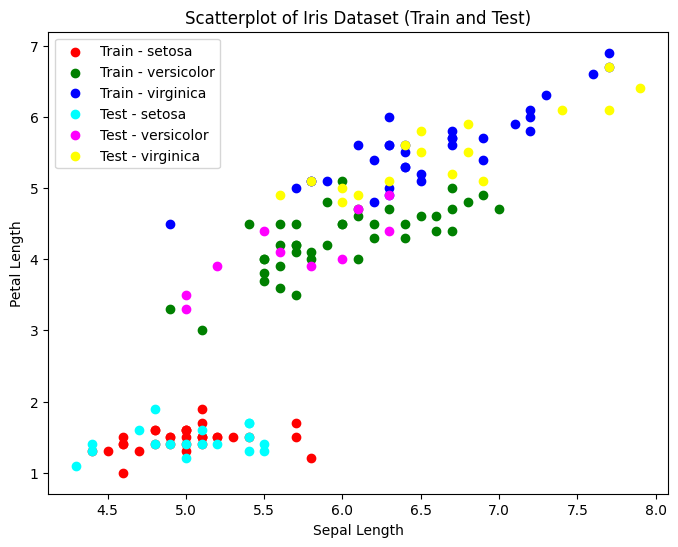

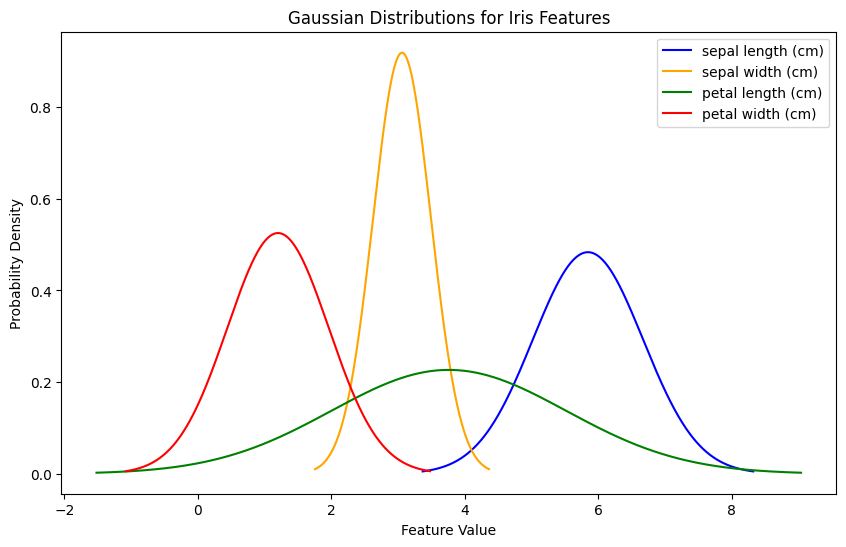

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import norm

# Carregar o conjunto de dados iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Cores para os diferentes tipos de dados
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']

# Scatterplot dos dados de treino e teste
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 2], c=colors[i], label=f'Train - {iris.target_names[i]}')
for i in range(3):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 2], c=colors[i + 3], label=f'Test - {iris.target_names[i]}')

# Adicionar labels e título
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Scatterplot of Iris Dataset (Train and Test)")
plt.legend()
plt.show()

# Código para gerar a distribuição gaussiana para cada característica
feature_names = iris.feature_names
num_features = X.shape[1]
colors_gaussian = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(10, 6))
for i in range(num_features):
    # Parâmetros da distribuição
    mu, sigma = np.mean(X[:, i]), np.std(X[:, i])

    # Geração de pontos para a curva da distribuição gaussiana
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
    y = norm.pdf(x, mu, sigma)

    # Plotar a curva da distribuição gaussiana
    plt.plot(x, y, label=f'{feature_names[i]}', color=colors_gaussian[i])

# Adicionar labels e título
plt.xlabel("Feature Value")
plt.ylabel("Probability Density")
plt.title("Gaussian Distributions for Iris Features")
plt.legend()
plt.show()


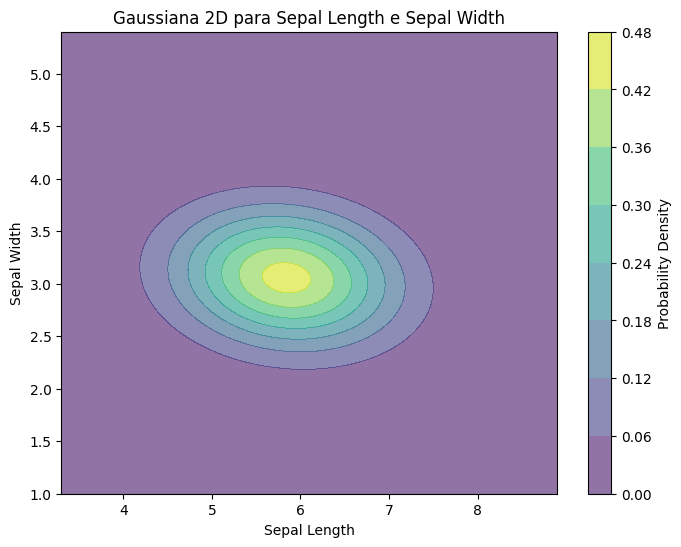

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import multivariate_normal

# Carregar o conjunto de dados iris
iris = load_iris()
X = iris.data[:, :2]  # Usar apenas as duas primeiras características (Sepal Length e Sepal Width)

# Calcular a média e a matriz de covariância
mu = np.mean(X, axis=0)
cov = np.cov(X, rowvar=False)

# Geração de pontos para o gráfico
x = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 100)
y = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, 100)
X_grid, Y_grid = np.meshgrid(x, y)
pos = np.dstack((X_grid, Y_grid))

# Calcular a densidade da distribuição gaussiana multivariada
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)

# Plotar a densidade da distribuição gaussiana
plt.figure(figsize=(8, 6))
contour = plt.contourf(X_grid, Y_grid, Z, cmap='viridis', alpha=0.6)
plt.colorbar(contour, label='Probability Density')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Gaussiana 2D para Sepal Length e Sepal Width')
plt.show()


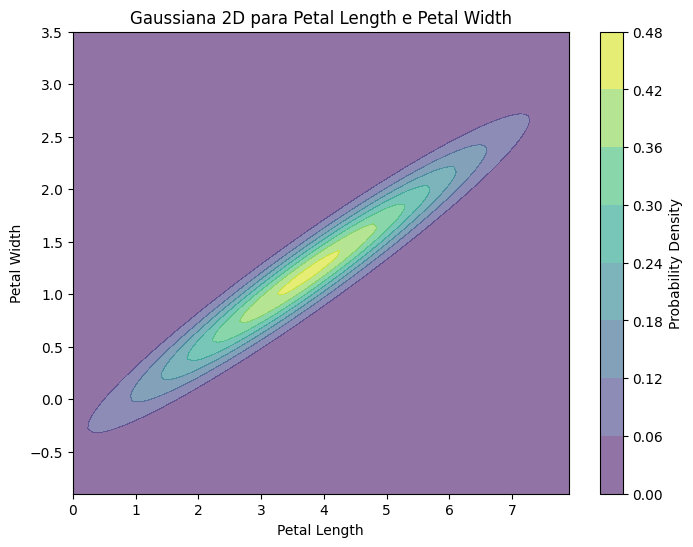

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import multivariate_normal

# Carregar o conjunto de dados iris
iris = load_iris()
X = iris.data[:, 2:4]  # Usar apenas as duas características Petal Length e Petal Width

# Calcular a média e a matriz de covariância
mu = np.mean(X, axis=0)
cov = np.cov(X, rowvar=False)

# Geração de pontos para o gráfico
x = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 100)
y = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, 100)
X_grid, Y_grid = np.meshgrid(x, y)
pos = np.dstack((X_grid, Y_grid))

# Calcular a densidade da distribuição gaussiana multivariada
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)

# Plotar a densidade da distribuição gaussiana
plt.figure(figsize=(8, 6))
contour = plt.contourf(X_grid, Y_grid, Z, cmap='viridis', alpha=0.6)
plt.colorbar(contour, label='Probability Density')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Gaussiana 2D para Petal Length e Petal Width')
plt.show()


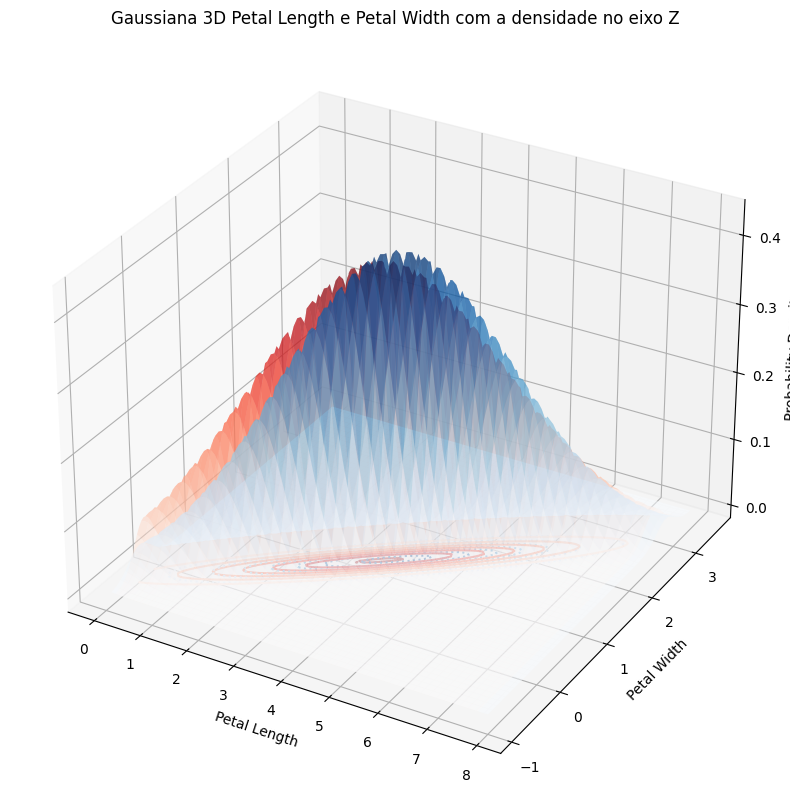

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Carregar o conjunto de dados iris
iris = load_iris()
X = iris.data[:, 2:4]  # Usar apenas as duas características Petal Length e Petal Width
y = iris.target

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Função para calcular a densidade da distribuição gaussiana 2D
def compute_gaussian_2d(X):
    mu = np.mean(X, axis=0)
    cov = np.cov(X, rowvar=False)
    x = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 100)
    y = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, 100)
    X_grid, Y_grid = np.meshgrid(x, y)
    pos = np.dstack((X_grid, Y_grid))
    rv = multivariate_normal(mu, cov)
    Z = rv.pdf(pos)
    return X_grid, Y_grid, Z

# Calcular a densidade da distribuição gaussiana 2D para os conjuntos de treino e teste
X_grid_train, Y_grid_train, Z_train = compute_gaussian_2d(X_train)
X_grid_test, Y_grid_test, Z_test = compute_gaussian_2d(X_test)

# Plotar a densidade da distribuição gaussiana em 3D
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotar as superfícies gaussianas
ax.plot_surface(X_grid_train, Y_grid_train, Z_train, cmap='Blues', alpha=0.5)
ax.plot_surface(X_grid_test, Y_grid_test, Z_test, cmap='Reds', alpha=0.5)

# Plotar as curvas de nível no plano XY
ax.contour(X_grid_train, Y_grid_train, Z_train, zdir='z', offset=-0.01, cmap='Blues', linestyles='dotted')
ax.contour(X_grid_test, Y_grid_test, Z_test, zdir='z', offset=-0.01, cmap='Reds')

# Ajustar os limites do eixo Z
ax.set_zlim(-0.01, np.max([Z_train.max(), Z_test.max()]))

# Adicionar rótulos e título
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Probability Density')
ax.set_title('Gaussiana 3D Petal Length e Petal Width com a densidade no eixo Z')
plt.show()


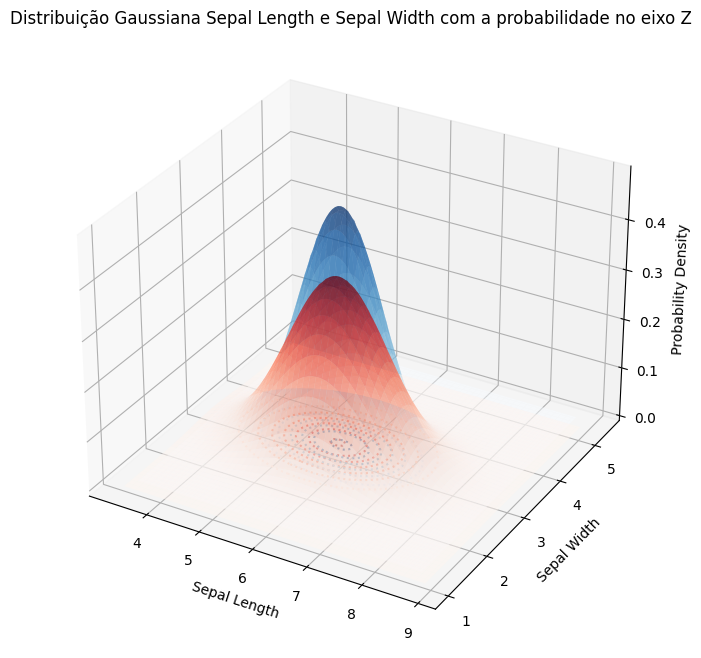

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Carregar o conjunto de dados iris
iris = load_iris()
X = iris.data[:, :2]  # Usar apenas as duas características Sepal Length e Sepal Width
y = iris.target

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Função para calcular a densidade da distribuição gaussiana 2D
def compute_gaussian_2d(X):
    mu = np.mean(X, axis=0)
    cov = np.cov(X, rowvar=False)
    x = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 100)
    y = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, 100)
    X_grid, Y_grid = np.meshgrid(x, y)
    pos = np.dstack((X_grid, Y_grid))
    rv = multivariate_normal(mu, cov)
    Z = rv.pdf(pos)
    return X_grid, Y_grid, Z

# Calcular a densidade da distribuição gaussiana 2D para os conjuntos de treino e teste
X_grid_train, Y_grid_train, Z_train = compute_gaussian_2d(X_train)
X_grid_test, Y_grid_test, Z_test = compute_gaussian_2d(X_test)

# Plotar a densidade da distribuição gaussiana em 3D
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar as superfícies gaussianas
ax.plot_surface(X_grid_train, Y_grid_train, Z_train, cmap='Blues', alpha=0.5)
ax.plot_surface(X_grid_test, Y_grid_test, Z_test, cmap='Reds', alpha=0.5)

# Plotar as curvas de nível ao longo do eixo Z, definindo o offset
contour_z_train = ax.contour(X_grid_train, Y_grid_train, Z_train, zdir='z', offset=np.min(Z_train) + 0.02, cmap='Blues', linestyles='dotted')
contour_z_test = ax.contour(X_grid_test, Y_grid_test, Z_test, zdir='z', offset=np.min(Z_test) + 0.02, cmap='Reds', linestyles='dotted')

# Adicionar rótulos e título
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Probability Density')
ax.set_title('Distribuição Gaussiana Sepal Length e Sepal Width com a probabilidade no eixo Z')

plt.show()
